# Support Vector Machines

## 1. Social Network Ads 

En primer lugar vamos a trabajar con el dataset de Social Networks Ads, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads).

### Columnas del dataset:
* User ID: identificación de usuario.
* Gender: género.
* Age: edad.
* EstimatedSalary: salario estimado.
* Purchased: compró/no compró un producto en particular.

Ahora sí, a trabajar. En primer lugar, recomendamos hacer una pequeña exploración de datos si tienes tiempo. Luego, sigue los pasos que aquí te dejamos. Si te sientes seguro/a, hasta puedes intentar implementar un SVM sobre ese dataset sin mirar la guía que dejamos. En ese caso, te conviene hacerlo en otro notebook. ¡Inténtalo!

1. Importa las librerías necesarias y carga el dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('DS_Bitácora_25_ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


2. Sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary` (así podemos visualizar). Y como target a la columna `Purchased`

In [3]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

3. Separa los datos de entrenamiento de los datos de prueba.

In [4]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

4. Estandariza los datos (`StandardScaler`).

In [5]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

5. Entrena un SVM. Para ello, utiliza la clase `SVC` de la librería Scikit-Learn cuya documentación la puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [6]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

6. Realiza las predicciones sobre los datos de prueba.

In [7]:
Y_Pred = classifier.predict(X_Test)

7. Visualiza los resultados mediante:
 
* Matriz de confusión (`confusion_matrix`)
* Reporte de clasificación (`classification_report`)
* Gráfico de fronteras de decisión (¡Busca en notebooks anteriores!)

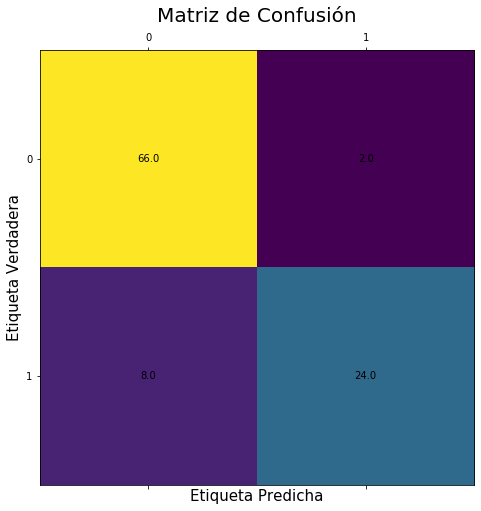

In [8]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [9]:
# Reporte de Clasificación
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



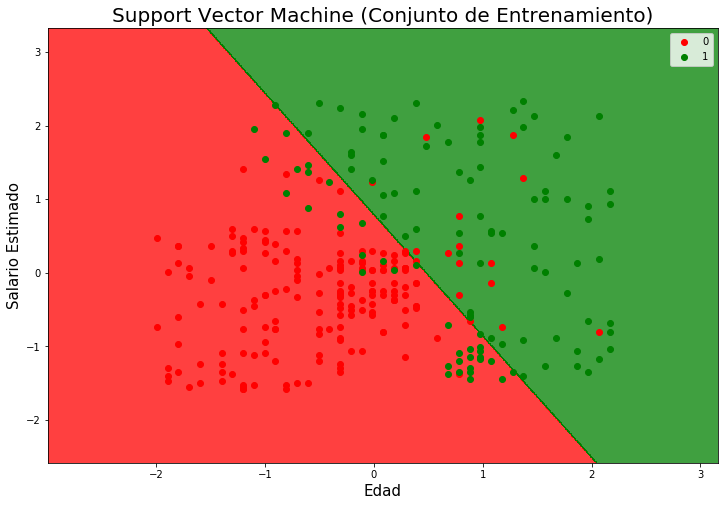

In [10]:
# Visualizando los resultados en el set de entrenamiento
from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Conjunto de Entrenamiento)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

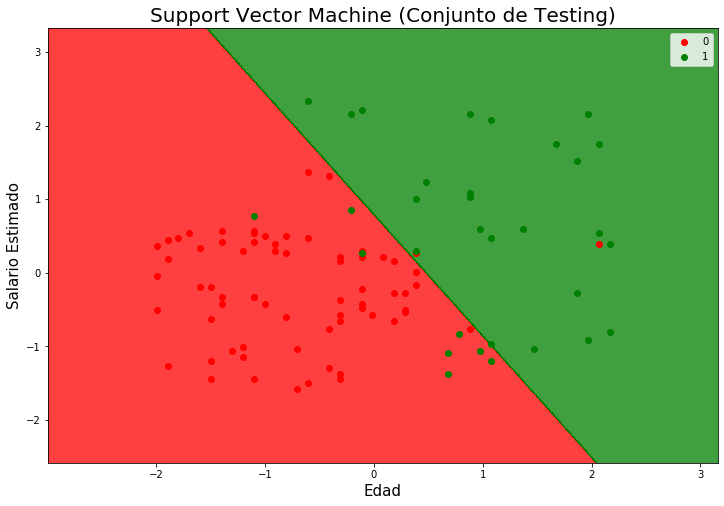

In [11]:
# Visualizando los resultados en el set de testing
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Conjunto de Testing)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

### Paso a paso

que hace el meshgrid? 
Return coordinate matrices from coordinate vectors https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

https://www.geeksforgeeks.org/numpy-meshgrid-function/

In [12]:
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

print(X1.shape)
print(X2.shape)
X2[:5,:]

(592, 616)
(592, 616)


array([[-2.58254245, -2.58254245, -2.58254245, ..., -2.58254245,
        -2.58254245, -2.58254245],
       [-2.57254245, -2.57254245, -2.57254245, ..., -2.57254245,
        -2.57254245, -2.57254245],
       [-2.56254245, -2.56254245, -2.56254245, ..., -2.56254245,
        -2.56254245, -2.56254245],
       [-2.55254245, -2.55254245, -2.55254245, ..., -2.55254245,
        -2.55254245, -2.55254245],
       [-2.54254245, -2.54254245, -2.54254245, ..., -2.54254245,
        -2.54254245, -2.54254245]])

In [13]:
print(X1.ravel()) # Return a contiguous flattened array.
#https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

[-2.99318916 -2.98318916 -2.97318916 ...  3.13681084  3.14681084
  3.15681084]


In [14]:
print(np.array([X1.ravel(), X2.ravel()]))

[[-2.99318916 -2.98318916 -2.97318916 ...  3.13681084  3.14681084
   3.15681084]
 [-2.58254245 -2.58254245 -2.58254245 ...  3.32745755  3.32745755
   3.32745755]]


In [15]:
print(np.array([X1.ravel(), X2.ravel()]).T)

[[-2.99318916 -2.58254245]
 [-2.98318916 -2.58254245]
 [-2.97318916 -2.58254245]
 ...
 [ 3.13681084  3.32745755]
 [ 3.14681084  3.32745755]
 [ 3.15681084  3.32745755]]


In [16]:
print(classifier.predict(np.array([X1.ravel(), X2.ravel()]).T))# necesito que este en columnas

[0 0 0 ... 1 1 1]


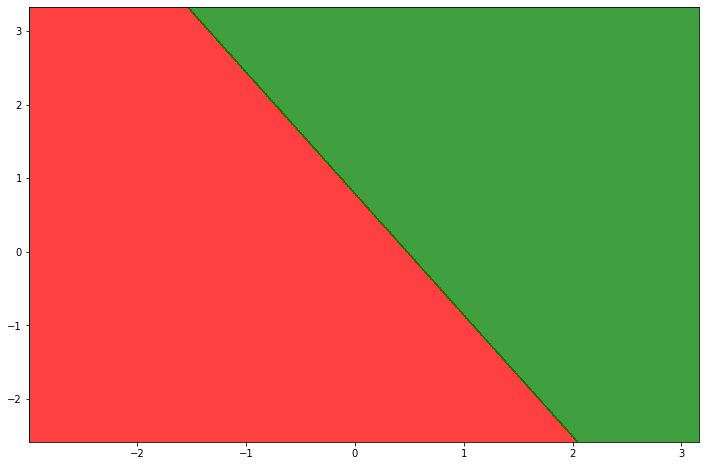

In [17]:
# ahora graficamos las fronteras de decision, a cada punto de la grilla le asigna un color dado por la prediccion del modelo en funcion del x1, x2
plt.figure(figsize=(12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))


In [18]:
print(np.unique(Y_Set))

[0 1]


In [19]:
list(enumerate(np.unique(Y_Set)))

[(0, 0), (1, 1)]

In [20]:
print(X_Set[Y_Set == j, 0]) # son las instancias X1 que tienen j=0 p j= 1, LES VA A ASIGNAR EL COLOR EN FUNCION DE SU ETIQUETA EN Y_SET

[-0.21060859  1.67100423  0.8787462   0.8787462   1.07681071 -0.11157634
  1.86906873  1.07681071  0.48261718  1.37390747  1.07681071  1.86906873
  2.06713324  0.68068169  1.07681071  2.1661655  -0.21060859  2.1661655
 -0.60673761  0.68068169  1.47293972  0.8787462   1.96810099  1.96810099
  0.38358493  2.06713324  0.77971394 -0.11157634 -1.10189888  0.97777845
  0.97777845  0.38358493]


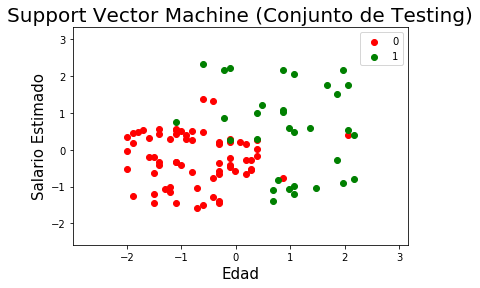

In [21]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Conjunto de Testing)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

## Armo una funcion que haga la evaluacion y visualizacion

In [31]:
def evaluar_clasificacion(classifier, X_train, X_test, y_train, y_test):
    
    y_pred = classifier.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(12,8))
    ax.matshow(cm)
    plt.title('Matriz de Confusión', fontsize=20)
    plt.ylabel('Etiqueta Verdadera', fontsize=15)
    plt.xlabel('Etiqueta Predicha', fontsize=15)
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
    print(classification_report(y_test, y_pred))    
    
    # Visualizando los resultados en el set de testing
    X_Set, Y_Set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

    plt.figure(figsize=(12,8))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(['red', 'green']))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y_Set)):
        plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                    c = [ListedColormap(('red', 'green'))(i)], label = j)
    plt.title('Support Vector Machine (Conjunto de Testing)', fontsize=20)
    plt.xlabel('Edad', fontsize=15)
    plt.ylabel('Salario Estimado', fontsize=15)
    plt.legend()
    plt.show()
    
    X_Set, Y_Set = X_Train, Y_Train
    X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

    plt.figure(figsize=(12,8))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y_Set)):
        plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                    c = [ListedColormap(('red', 'green'))(i)], label = j)
    plt.title('Support Vector Machine (Conjunto de Entrenamiento)', fontsize=20)
    plt.xlabel('Edad', fontsize=15)
    plt.ylabel('Salario Estimado', fontsize=15)
    plt.legend()
    plt.show()

**Para probar:**
1. Modifica el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el mismo y su performance. Por ejemplo, prueba con con los siguientes kernels: `rbf`, `poly` y `sigmoid`.



2. ¿Cuál es la función del parámetro `Gamma`?

3. Repite el ejercicio 1, modificando los valores de `Gamma`


4. Modifica el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 

## 2. Manos a la obra: Kernel + SVM

En base a todo lo visto en anteriormente, vamos a aplicar SVM al dataset `DS_Clase_04_iris.csv` ¿Cuantas clases tiene este dataset? ¿Es un problema multiclase? 

**Para investigar:** ¿Qué función cumple el parámetro `decision_function_shape` de la función SVC de scikit-learn?

Presentacion vieja +
https://stackoverflow.com/questions/43505451/which-decision-function-shape-for-sklearn-svm-svc-when-using-onevsrestclassifier


**Ejercicios:**

1. Implementa 3 clasificadores SVM con Kernels: `Polinómico`, `Gaussiano` y `Sigmoide`
2. Realiza la matriz de confusión y el reporte de clasificación para cada kernel.
3. ¿Qué Kernel produce los mejores resultados?


`Tip:` Utilizando el código visto al comienzo de la notebook, podés crear funciones que te permitan graficar la matriz de confusión y los límites de clasificación, sin tener que copiar y pegar todo el código.